In [120]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [121]:
image_path = "pic1.jpg"

In [122]:
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
original = img.copy()

(-0.5, 2047.5, 1991.5, -0.5)

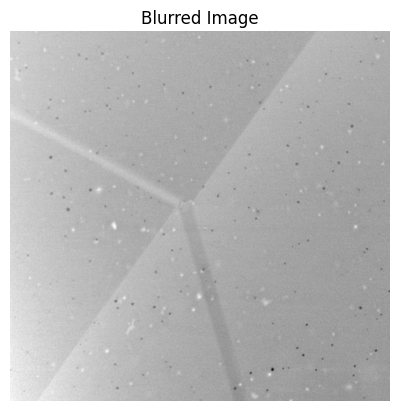

In [123]:
# Apply Gaussian blur to reduce general noise
blurred = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(blurred, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

(-0.5, 2047.5, 1991.5, -0.5)

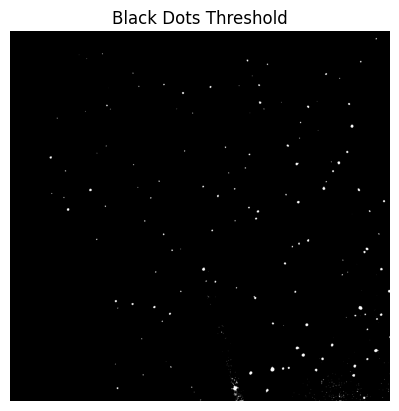

In [124]:
# Detect black dots
_, black_thresh = cv2.threshold(blurred, 130, 255, cv2.THRESH_BINARY_INV)
plt.imshow(black_thresh, cmap='gray')
plt.title('Black Dots Threshold')
plt.axis('off')

(-0.5, 2047.5, 1991.5, -0.5)

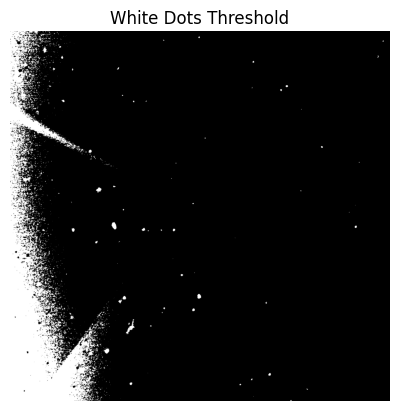

In [125]:
# Detect white dots
_, white_thresh = cv2.threshold(blurred, 180, 255, cv2.THRESH_BINARY)
plt.imshow(white_thresh, cmap='gray')
plt.title('White Dots Threshold')
plt.axis('off')

In [126]:

height, width = img.shape
white_mask = np.ones((height, width), dtype=np.uint8) * 255
left_margin = int(width * 0.24)  # Adjust this value to exclude more/less of the left side
white_mask[:, :left_margin] = 0

(-0.5, 2047.5, 1991.5, -0.5)

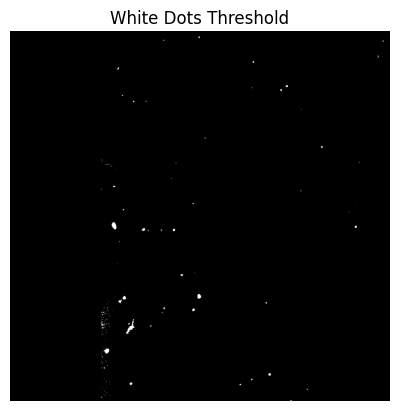

In [127]:
# Apply mask only to white threshold
white_thresh = cv2.bitwise_and(white_thresh, white_thresh, mask=white_mask)
plt.imshow(white_thresh, cmap='gray')
plt.title('White Dots Threshold')
plt.axis('off')

In [128]:
# Find contours for black dots
black_contours, _ = cv2.findContours(
      black_thresh,
      cv2.RETR_EXTERNAL,
      cv2.CHAIN_APPROX_SIMPLE
)

# Find contours for white dots
white_contours, _ = cv2.findContours(
      white_thresh,
      cv2.RETR_EXTERNAL,
      cv2.CHAIN_APPROX_SIMPLE
)

In [129]:
min_area = 5
max_area = 1000

black_dots = []
white_dots = []

In [130]:
# Filter black dots
for contour in black_contours:
      area = cv2.contourArea(contour)
      if min_area <= area <= max_area:
          mask = np.zeros_like(img)
          cv2.drawContours(mask, [contour], -1, 255, -1)
          mean_intensity = cv2.mean(img, mask=mask)[0]
          if mean_intensity < 128:
              black_dots.append(contour)

In [131]:
# Filter white dots
for contour in white_contours:
      area = cv2.contourArea(contour)
      if min_area <= area <= max_area:
          mask = np.zeros_like(img)
          cv2.drawContours(mask, [contour], -1, 255, -1)
          mean_intensity = cv2.mean(img, mask=mask)[0]
          if mean_intensity >= 128:
              white_dots.append(contour)

Text(0.5, 1.0, 'Detected Dots')

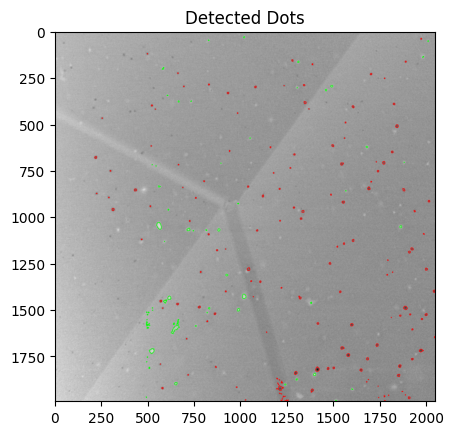

In [132]:
#Results
result = cv2.cvtColor(original, cv2.COLOR_GRAY2BGR)
cv2.drawContours(result, black_dots, -1, (0, 0, 255), 2)  # Red for black dots
cv2.drawContours(result, white_dots, -1, (0, 255, 0), 2)  # Green for white dots

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Detected Dots')



In [133]:
print(f"Number of black dots: {len(black_dots)}")
print(f"Number of white dots: {len(white_dots)}")

Number of black dots: 152
Number of white dots: 62
